<a href="https://colab.research.google.com/github/X1Atomic/CollabGraph/blob/main/CentralityAndCommunityDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Important imports

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import igraph as ig
from IPython.display import SVG, display

Reading the CSV Files

Erdos1 is the set of 475 coauthors with erdos number 1 out of the 512

Erdos2 is the set of 

In [103]:
erdos1 = 'erdos1s-2.csv'
F = nx.read_edgelist(erdos1, delimiter=":")

erdos2 = 'erdos_coauthor_pairs.csv'
G = nx.read_edgelist(erdos2, delimiter=":")

Plot the Erdos 1 Graph

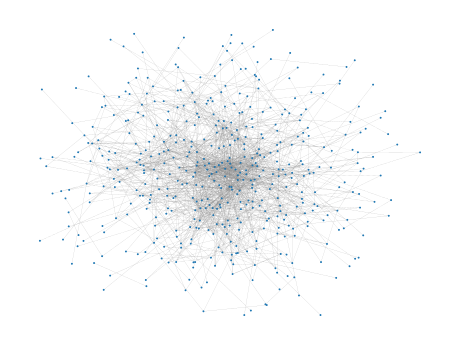

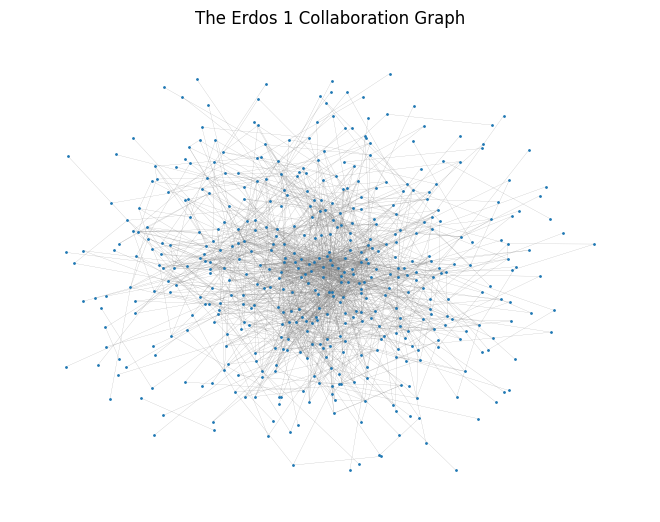

In [104]:
pos = nx.spring_layout(F, k=0.15, iterations=20)
nx.draw(F, pos, node_size=1, edge_color='gray', width=0.1)

plt.title('The Erdos 1 Collaboration Graph')
plt.savefig('erdos1.svg', format='svg')
display(SVG('erdos1.svg'))

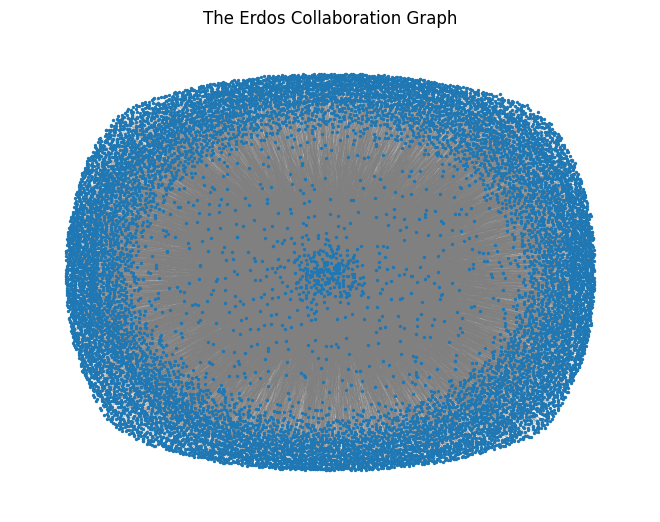

In [101]:
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw(G, pos, node_size=2, edge_color='gray', width=0.1)

plt.title('The Erdos Collaboration Graph')
plt.savefig('erdos1.svg', format='svg')
display(SVG('erdos1.svg'))

#Algorithms




Crating a directory for the community detection to reference instead of the output being a list of number

In [91]:
node_lookup = {i: node for i, node in enumerate(sorted(G.nodes()))}

Run the Infomap algorithm

In [ ]:
for i, community in enumerate(infomap):
    node_ids = [node_lookup[node_idx] for node_idx in community]
    print(f"Community {i}: {node_ids}")

Community 7 is consistently the largest in infomap – let's check its order

In [ ]:
community_size = len(infomap[7])
print(community_size)

Now let's try the Louvain algorithm

In [22]:
import pandas as pd
import igraph as ig

csv_file = 'erdos1s-2.csv'
df = pd.read_csv(csv_file)
g = ig.Graph.TupleList(df.itertuples(index=False), directed=False)

# Applying the louvain alrogithm
membership = g.community_multilevel().membership


for i in set(membership):
    print("Community", i+1, ":")
    members = [node.index for node in g.vs if membership[node.index] == i]
    print(members)

ParserError: ignored

# Measures of Centrality

## Degree Centrality

In [79]:
degree_centralities = nx.degree_centrality(G)

max_degree_centrality_node = max(degree_centralities, key=degree_centralities.get)

print(f"Max C_Degree: {max_degree_centrality_node}, {degree_centralities[max_degree_centrality_node]}.")

Max C_Degree: ALON, NOGA MORDECHAI, 0.03968253968253968.


## Closeness Centrality

In [63]:
closeness_centralities = nx.closeness_centrality(F)

max_closeness_centrality_node = max(closeness_centralities, key=closeness_centralities.get)

print(f"Max C_Closeness: {max_closeness_centrality_node}, {closeness_centralities[max_closeness_centrality_node]}.")

Max C_Closeness: ALON, NOGA MORDECHAI, 0.3905669404066892.


##Betweenness Centrality

In [49]:
betweenness_centralities = nx.betweenness_centrality(F)

max_betweenness_centrality_node = max(betweenness_centralities, key=betweenness_centralities.get)

print(f"Max C_Betweenness: {max_betweenness_centrality_node}, {betweenness_centralities[max_betweenness_centrality_node]}.")

Max C_Betweenness: HARARY, FRANK*, 0.08202786030658595.


## Eigenvector Centrality

In [62]:
eigenvector_centralities = nx.eigenvector_centrality(F)

max_eigenvector_centrality_node = max(eigenvector_centralities, key=eigenvector_centralities.get)

print(f"Max Eigenvector: {max_eigenvector_centrality_node}, {eigenvector_centralities[max_eigenvector_centrality_node]}.")

Max Eigenvector: ALON, NOGA MORDECHAI, 0.26575764623685655.


## Katz Centrality

In [ ]:
katz_centrality = nx.katz_centrality(F, alpha=0.01, max_iter=10000)

for node, centrality in katz_centrality.items():
    print(f"Node {node}: Katz centrality = {centrality}")

In [41]:
max_katz_centrality_node = max(katz_centrality, key=katz_centrality.get)
print(f"Max Kats: {max_katz_centrality_node}, {katz_centrality[max_katz_centrality_node]}.")

Max Kats: ALON, NOGA MORDECHAI, 0.07257205075529548.


## Displaying the Network Coloured by Centralities

In [ ]:
cmap = plt.cm.Reds
vmin = min(katz_centrality.values())
vmax = max(katz_centrality.values())
node_sizes = [centrality_value * 1000 for centrality_value in katz_centrality.values()]

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=list(katz_centrality.values()), cmap=cmap, vmin=vmin, vmax=vmax, node_size=2, edge_color='black', width=0.1)

plt.title('The Erdos 1 Betweenness Centrality')
plt.savefig('erdos1ss.svg', format='svg')
plt.show()

display(SVG('erdos1ss.svg'))

In [37]:
g = ig.Graph()
g.add_vertices(list(F.nodes()))
g.add_edges(list(F.edges()))

infomap = g.community_infomap()

for i, community in enumerate(infomap):
    print(f"Community {i}: {community}")

Community 0: [0, 1, 2, 3, 4, 6, 93, 196, 211, 286, 344]
Community 1: [5, 67, 177, 178, 179, 180, 181, 182, 333, 340, 399]
Community 2: [7, 134, 135, 313, 314, 315, 316, 366, 405]
Community 3: [8, 9, 301, 312, 322, 323, 360, 367, 388, 396, 397, 407, 461, 474]
Community 4: [10, 55, 56, 57, 112, 113, 115, 173, 431, 464]
Community 5: [11, 12, 58, 81, 88, 90, 140, 141, 142, 143, 144, 148, 199, 226, 227, 228, 275, 291, 317, 320, 321, 324, 325, 328, 330, 358, 383, 384, 385, 392, 393, 394, 395, 410, 445, 459, 460, 463, 465]
Community 6: [13, 15, 18, 22, 23, 24, 124, 154, 155, 156, 157, 215, 252, 341, 353, 359, 370, 371, 436, 449, 458]
Community 7: [14, 19, 20, 21, 30, 31, 32, 33, 34, 35, 36, 38, 39, 44, 45, 60, 61, 62, 64, 65, 66, 68, 70, 71, 73, 74, 75, 76, 78, 79, 80, 85, 87, 89, 91, 92, 94, 95, 96, 107, 108, 114, 120, 121, 122, 126, 128, 129, 130, 131, 132, 133, 197, 200, 204, 205, 206, 207, 229, 230, 235, 236, 237, 238, 239, 247, 265, 268, 284, 302, 310, 331, 349, 363, 374, 376, 433, 446, 

NameError: ignored